# Overview

1. Project Context
2. Build Multiclass Classification Model
3. Evaluating Model
4. Feuture Analysis

#  1. Project Context

**Objective**


**Data Schema**


# 2. Data Analysis and Feature Selection

In [80]:
#library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

SEED = 42

**Dataset Loading and Schema Review**

In [4]:
path_input = "data"
dataset = "dataset.csv"

df = pd.read_csv(path_input + "/" + dataset, sep = ";", decimal = ",")

In [10]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

<AxesSubplot:xlabel='NSP', ylabel='Count'>

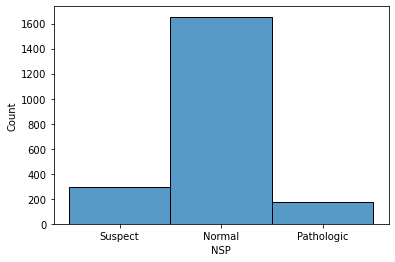

In [7]:
#Display historam of target Class
sns.histplot(df['NSP'])

- Valori Nulli
    - Non sono presenti valori nulli nelle fauture


- Target Class
    - La class target non è distribuita uniformemente essendoci un maggior numero di valori Normali. Nella fase di train test split ne dovrò tenere conto

**Feature Selection**

Non conoscendo il tipo di dato è bene capire quali siano le fature che hanno un maggior impatto sulla colonna target in modo da selezionarle in fase di sviluppo del modello

In [99]:
x_data = df.drop(columns = ["NSP"])

feautures_name = x_data.columns

#Perchè RobustScaler?
x_standard = RobustScaler().fit_transform(x_data.values)
x = pd.DataFrame(x_standard)
x.columns = feautures_name
y = df["NSP"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED,stratify=y)

In [104]:
clf_DTC = DecisionTreeClassifier(random_state=SEED)
clf_DTC.fit(X_train, y_train)

y_pred_DTC = clf_DTC.predict(X_test)

In [105]:
# f1 Pesato

print("f1_weighted:",metrics.f1_score(y_test, y_pred_DTC ,average='weighted'))

# Accuratezza

print("accuracy:",metrics.accuracy_score(y_test, y_pred_DTC))

# Classification Report
print(metrics.classification_report(y_pred_DTC, y_test))

f1_weighted: 0.9132575879160922
accuracy: 0.9153605015673981
              precision    recall  f1-score   support

      Normal       0.96      0.94      0.95       507
  Pathologic       0.94      0.93      0.93        54
     Suspect       0.66      0.75      0.70        77

    accuracy                           0.92       638
   macro avg       0.85      0.87      0.86       638
weighted avg       0.92      0.92      0.92       638



In [107]:
clf_RMC = RandomForestClassifier(random_state=SEED)
clf_RMC.fit(X_train, y_train)
y_pred_RMC = clf_RMC.predict(X_test)

In [108]:
# f1 Pesato

print("f1_weighted:",metrics.f1_score(y_test, y_pred_RMC ,average='weighted'))

# Accuratezza

print("accuracy:",metrics.accuracy_score(y_test, y_pred_RMC))

# Classification Report

print(metrics.classification_report(y_pred_RMC, y_test))

f1_weighted: 0.9428251641276724
accuracy: 0.9435736677115988
              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97       501
  Pathologic       0.96      0.91      0.94        56
     Suspect       0.78      0.85      0.82        81

    accuracy                           0.94       638
   macro avg       0.91      0.91      0.91       638
weighted avg       0.95      0.94      0.94       638



In [109]:
def plot_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

  return

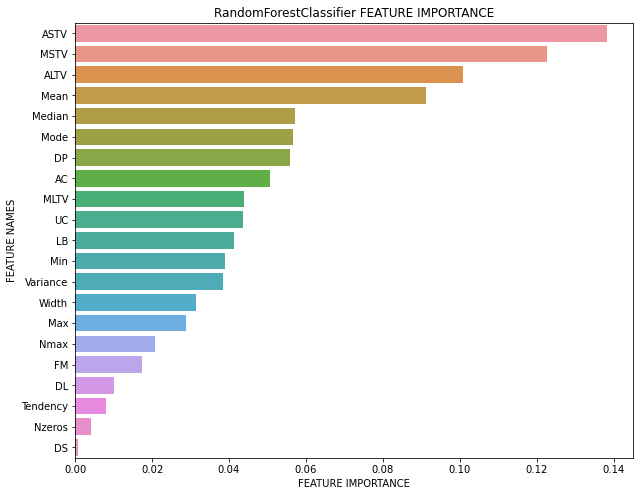

In [110]:
feature_to_select = plot_importance(importance=clf_RMC.feature_importances_,
                                    names=feautures_name,
                                    model_type= clf_RMC.__class__.__name__)